In [50]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import librosa as lr
from librosa.display import waveshow, specshow
from pysndfx import AudioEffectsChain

%matplotlib inline

In [51]:
# Load audio with LibROSA.
file_path = './TinHieuHuanLuyen/45MDV.wav'
y, sr = lr.load(file_path,sr=None)
# Load audio file
print(sr,':' , y)

44100 : [0.00021362 0.00021362 0.00012207 ... 0.00158691 0.00097656 0.00036621]


In [52]:
def pitch_peak(audio_samples,
              sample_rate=sr,
              window_length=(2 ** int(np.ceil(np.log2(0.025 * sr)))),
              hop_length=int(sr * 0.01),
              window=np.hanning,
              plot=True,
              threshold=None):
    """Estimate the pitch contour in a monophonic audio signal."""
    # print((2 ** int(np.ceil(np.log2(0.025 * sr)))))
    f0s = []
    frequencies = np.fft.rfftfreq(window_length, 1 / sample_rate)
    window = window(window_length)
    pad = lambda a: np.pad(a, 
                           (0, window_length - len(a)),
                           mode='constant',
                           constant_values=0)

    # Low cut filter audio at 50 Hz.
    # audio_samples = AudioEffectsChain().highpass(50)(audio_samples)

    # Go through audio frame-by-frame.
    for i in range(0, len(audio_samples), hop_length):

        # Fourier transform audio frame.
        frame = window * pad(audio_samples[i:window_length + i])
        spectrum = np.fft.rfft(frame)

         # Find peak frequency.
        if threshold is not None:
            peaks, _ = sp.signal.find_peaks(np.abs(spectrum), height=threshold)
        else:
            peaks = [np.argmax(np.abs(spectrum))]

        peak_frequencies = frequencies[peaks]
        if len(peak_frequencies) > 0:
            f0s.append(peak_frequencies[0])
        else:
            f0s.append(0)

        if plot:
            # Plot spectrum.
            plt.plot(frequencies, np.abs(spectrum))
            plt.title('Spectrum with Peak')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Magnitude')
            plt.show()
            plot = False

    f0s = np.array(f0s)
    f0s = f0s[(f0s >= 70) & (f0s <= 400)]

    # Median filter out noise.
    f0s = sp.signal.medfilt(f0s, [21])

    return f0s

2048


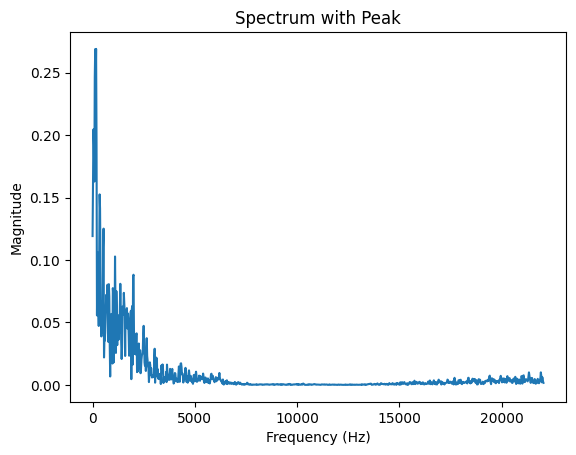

2048


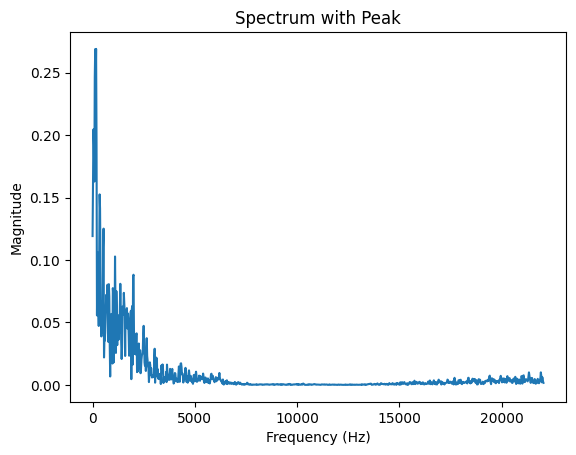

Trung bình của f0s:  236.865234375


In [53]:
pitch_peak(y, threshold=0.9)
f0s = pitch_peak(y)
f0_mean = np.mean(f0s)
print("Trung bình của f0s: ", f0_mean)